## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [2]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


## Data exploration

In [3]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential


In [4]:
df.shape

(1659, 54)

## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. 

In [5]:
# Display the summary statistics of the dataset
df = df.drop(['PatientID', 'DoctorInCharge'], axis = 1)


In [6]:
## More code to be adde here (maybe)

## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [7]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
print(df.describe(include='all'))


               Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.00000          1659.000000   
mean     54.441230     0.515371     0.71308             0.977697   
std      20.549757     0.499914     1.00043             0.776686   
min      20.000000     0.000000     0.00000             0.000000   
25%      36.000000     0.000000     0.00000             0.000000   
50%      54.000000     1.000000     0.00000             1.000000   
75%      72.000000     1.000000     1.00000             2.000000   
max      90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.910611     7.288670     0.455252            5.798787   
min          0.000000    15.033888     0.000000            0.021740   
25%          1.000000    21.4714

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

In [8]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis

# Zarrin
### To be 
#testing

The dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

In [9]:
# Add code for scatter plot

# Katreyna
### To be done

Scatterplot showing 'GFR' and 'SerumCreatinine'

In [10]:
# Add code for scatter plot

# Katreyna 
### To be done


For categorical variables, Frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

Distribution summary or frequency table for all the categorical variables

In [11]:
# Add code for frequency tables/bar charts for categorical features


categorical_features = [
    # demographic
    'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 
    # Lifestyle
    'Smoking', 
    # Medical History
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 
    'UrinaryTractInfections',
    # Medications
    'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 
    # Symptoms and Quality of Life
    'Edema', 
    # Environmental and Occupational Exposures
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
    ]



# Zarrin
### To be done

## 3. Bivariate Analysis

### 1. Correlation Analysis

1. Pearson correlation matrix

Compute Pearson correlation coefficients between pairs of numerical variables (All variables or a set of variables: e.g., Serum Creatinine vs. GFR, Blood Pressure vs. GFR) to understand relationships.


In [23]:

# Standardize the columns (normalize) before finding correlation
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Add correlation matrix
correlation_matrix = df_standardized.corr()
print("Pearson Correlation Matrix:")
display(correlation_matrix)



Pearson Correlation Matrix:


,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
Age,1.000000,-0.037765,-0.006307,0.001448,0.008947,-0.033202,0.020215,-0.006030,0.003485,0.004062,-0.005151,0.014984,-0.008672,0.001114,0.028253,0.042979,0.050918,0.007282,-0.006815,0.026093,-0.019612,-0.041336,0.045831,-0.021659,-0.032800,0.004838,-0.003220,0.028401,-0.039311,0.011719,-0.023106,0.001591,-0.015607,-0.021061,-0.001364,0.004348,0.019042,0.000734,-0.015058,-0.016797,0.002977,-0.029556,0.001318,0.005683,-0.022676,0.043746,-0.014711,-0.038522,-0.015165,0.043168,0.010920,0.000919
Gender,-0.037765,1.000000,0.025707,0.004767,-0.022095,-0.023381,0.004054,-0.020473,0.014840,0.011517,-0.004312,0.032584,-0.007058,0.019137,0.038519,0.021116,0.031253,0.027322,-0.006086,0.003495,0.010221,-0.012786,0.030294,0.012642,-0.017650,0.018728,0.026549,0.009740,-0.018112,0.006620,0.037077,0.012775,0.033222,-0.034570,0.011813,0.061844,-0.003433,-0.004258,0.026516,0.013072,-0.003961,0.000570,-0.028158,0.001424,0.015554,0.013984,-0.000509,0.019628,0.020156,-0.026356,-0.014644,0.042239
Ethnicity,-0.006307,0.025707,1.000000,-0.047051,0.039696,-0.008506,0.019127,-0.033574,-0.057811,-0.012721,0.029833,0.010630,-0.021725,0.007602,0.025920,-0.024939,-0.017903,0.016126,0.038599,0.050558,-0.019571,0.023219,0.004514,-0.005262,-0.034707,-0.000465,0.008823,-0.010712,0.004365,-0.021487,0.050441,-0.014540,0.012009,-0.007313,0.028524,-0.029121,0.048621,0.000414,0.018603,-0.022343,-0.060223,0.013447,-0.004542,-0.031039,0.010930,0.008654,0.010036,-0.036629,0.023191,0.007489,0.012971,0.007199
SocioeconomicStatus,0.001448,0.004767,-0.047051,1.000000,-0.003711,-0.030242,0.021900,0.010864,-0.000259,-0.000394,-0.019183,-0.041888,-0.004820,0.054200,0.030082,-0.008031,-0.023491,0.019670,-0.045426,0.000801,-0.017501,0.045003,0.016207,0.001996,0.003091,-0.020260,-0.020116,-0.035272,-0.026572,-0.010521,-0.062895,0.050025,-0.015586,-0.033922,-0.023946,-0.067039,0.017293,0.008145,-0.006773,-0.026162,-0.015654,0.002195,-0.026640,-0.003762,-0.007924,0.036443,-0.013242,-0.005283,0.002820,0.009689,-0.022453,-0.034104
EducationLevel,0.008947,-0.022095,0.039696,-0.003711,1.000000,-0.016669,0.003070,0.046814,-0.003066,-0.013261,-0.003333,-0.015611,-0.028275,-0.012103,0.029514,-0.012872,0.014516,-0.006849,0.013999,0.010064,-0.006992,-0.021090,0.027940,-0.005571,-0.004994,0.011247,-0.006916,-0.000648,-0.037646,0.024930,-0.044451,-0.012215,0.001961,-0.015520,0.026615,0.004259,0.013555,-0.002857,-0.027863,0.009537,-0.014135,-0.021006,0.018786,0.004209,-0.016503,-0.047143,0.020611,-0.029415,0.022940,-0.005434,-0.000944,-0.037343
BMI,-0.033202,-0.023381,-0.008506,-0.030242,-0.016669,1.000000,-0.000968,-0.067239,0.003528,0.014539,0.011668,0.026117,-0.001755,-0.010746,-0.018380,0.014210,-0.017086,0.020390,0.022776,0.023096,0.045254,-0.013288,-0.014731,-0.033131,-0.008286,-0.006721,0.015011,0.017683,0.007203,-0.006558,0.012093,-0.012308,0.017027,0.040651,0.021327,0.014613,-0.003156,-0.037799,0.073360,0.012131,0.009345,0.023334,-0.030355,0.023998,-0.046046,-0.032956,0.008763,0.006205,0.002934,0.020329,-0.015661,0.055222
Smoking,0.020215,0.004054,0.019127,0.021900,0.003070,-0.000968,1.000000,0.032707,0.006153,-0.006386,0.013974,-0.024922,0.001519,-0.045710,0.003166,-0.013774,0.0256

2. Top 15 correlations between variables. 

This could give us information about what variables to use for building Linear Regression model (for continuous variables) and Linear Regression model (for categorical variable).

In [13]:
# Filter for top absolute correlations
# Example: Top 15 correlations by absolute value
num_top_correlations = 30

# Unstack the correlation matrix to create a Series
unstacked_correlation = correlation_matrix.unstack()

# Filter out diagonal elements where row index equals column index. Excluding self co-relation (For eg: Age with Age)
filtered_correlation = unstacked_correlation[unstacked_correlation.index.get_level_values(0) != unstacked_correlation.index.get_level_values(1)]


# Display the top sorted autocorrelations
top_correlations = filtered_correlation.sort_values(ascending=False, key=lambda x: np.abs(x)) .head(num_top_correlations)

# Drop duplicates based on sorted columns
# Reset index to convert MultiIndex to columns for easier manipulation
correlation_series = top_correlations.reset_index()
# Sort Variable1 and Variable2 to ensure consistent order
correlation_series[['level_0', 'level_1']] = pd.DataFrame(np.sort(correlation_series[['level_0', 'level_1']], axis=1))
unique_correlations = pd.DataFrame(correlation_series.drop_duplicates(subset=['level_0', 'level_1']))
unique_correlations.reset_index(inplace=True)

display(unique_correlations)


,index,level_0,level_1,0
0,0,Diagnosis,SerumCreatinine,0.201125
1,2,Diagnosis,GFR,-0.175988
2,4,Diagnosis,Itching,0.100652
3,6,Diagnosis,FastingBloodSugar,0.095694
4,8,Diagnosis,MuscleCramps,0.094811
5,10,BUNLevels,Diagnosis,0.093097
6,12,Diagnosis,ProteinInUrine,0.090014
7,14,Diagnosis,SystolicBP,0.083528
8,16,Diuretics,GFR,-0.074593
9,18,AntidiabeticMedications,BMI,0.073360


**Observations**

Positive correlation (e.g., 0.201125 between Diagnosis and SerumCreatinine): As SerumCreatinine increases, the Diagnosis tends to increase as well.

Negative correlation (e.g., -0.175988 between Diagnosis and GFR): As GFR increases, the Diagnosis tends to decrease.

The magnitude of the correlation coefficient (correlation) indicates how strong the relationship is between the two features. Values closer to -1 or 1 indicate a stronger correlation, while values closer to 0 indicate a weaker correlation.


3. Visualize correlations using heatmaps to identify strong correlations (>0.5 or <-0.5) among variables.

Intrepret Correlation coefficient from the heatmap to indicate positive/negative/0/strength of relationships. For eg: test association of Edema and CKD diagnosis

In [14]:
# Add code for correlation heatmap


# Adithya
### To be done

### 2. Relationships with CKD

Compare distributions of numerical variables (e.g., Age, BMI, clinical measurements) between CKD and non-CKD groups using box plots.
For example: Boxplot to show distribution of SerumCreatinine levels between patients diagnosed with CKD and those without CKD.
Box-plot make it easy to identify outliers and will help in understanding quality of data


In [15]:
# Add code for box plot


# Katreyna
### To be done


Use t-tests to assess statistical differences in means between groups for continuous variables.

E.g: Perform a t-test to see if there is a significant difference in the Serum Creatinine levels (SerumCreatinine) between patients diagnosed with Chronic Kidney Disease (CKD) (Diagnosis = 1) and those without CKD (Diagnosis = 0).

Make the Hypothesis statement and Alternative hypothesis statement.

In [16]:
# add code for t-test

# Adithya
### To be done

## Models

Lets find what factors can predict the likelihood of a patient having Chronic Kidney Disease (CKD)?

## Logistic Regression

Lets use logistic regression to model the probability of CKD based on predictor variables. 
Variables: Age, Gender, Ethnicity, Clinical measurements, Lifestyle factors, Medical history as predictors (all variables); CKD diagnosis (Diagnosis) as the binary response variable.



In [17]:
# add code here

# Kateryna
### To be done

Plots to show the model:

1. ROC curve: Plot sensitivity vs. 1-specificity to evaluate model performance.

2. Variable coefficient plot: Display coefficients of predictors to understand their impact on CKD likelihood.

In [18]:
# Add code here

# Anjali
### To be done

## Logistic regression analysis to determine odds ratios

Perform logistic regression analysis to determine odds ratios and assess the significance of variables such as hypertension, diabetes, and medication use in relation to Chronic Kidney Disease (CKD).
Choosing the following independent variables (predictors) to include in the logistic regression model:

1. Hypertension (FamilyHistoryHypertension)
2. Diabetes (FamilyHistoryDiabetes or AntidiabeticMedications)
3. Medication use (ACEInhibitors, Diuretics, Statins, NSAIDsUse, etc.)

In [19]:
# Add code here

# Anjali
### To be done

## KNN Model

Use k-Nearest Neighbors to predict the outcome of Chronic Kidney Disease based on the dataset. Use all predictor variables and/or a set of variables to train and test the model.  Use classification metrics such as accuracy, precision, recall, and F1-score to evaluate how well the k-NN model predicts CKD compared to actual outcomes in the test set. 

Accuracy of KNN model: 0.9180722891566265
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.92      0.99      0.96       384

    accuracy                           0.92       415
   macro avg       0.46      0.50      0.48       415
weighted avg       0.86      0.92      0.89       415



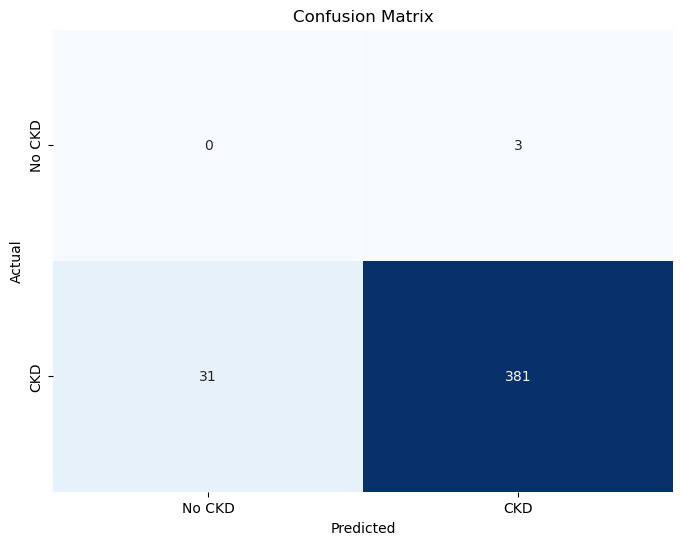

In [22]:

# X contains predictor variables including NSAID uses and y contains CKD diagnosis
#predictors = df[['ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications']]
# All variables except 'Diagnosis' is predictor
predictors = df.iloc[:, :-1] # all predictors

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# setting the seed
np.random.seed(45)

# Create a random vector of True and False values
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])


training_X = predictors_standardized[split] # Define the training set for X (predictors)
training_y = df.loc[split, 'Diagnosis']     # Define the training set for Y (response)


testing_X = predictors_standardized[~split] # Define the testing set for X (predictors)
testing_y = df.loc[~split, 'Diagnosis']     # Define the testing set for Y (response)


training_X, testing_X = [np.asarray(X) for X in [training_X, testing_X]]

# Build KNN model with 5 neigbbours
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(training_X, training_y)
knn_pred_y = knn.predict(testing_X)

# Print the confusion matrix
cm = confusion_matrix(knn_pred_y, testing_y)

accuracy = knn.score(testing_X, testing_y)
print("Accuracy of KNN model:", accuracy)

print(classification_report(testing_y, knn_pred_y))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Observations**

Precision (ratio of correctly predicted positive observations (CKD) to the total predicted positive observations.)

1. Precision for class 0 (no CKD): 0.00. This indicates that when the model predicted no CKD, it was almost always incorrect (since TN is 0).
2. Precision for class 1 (CKD): 0.92 When the model predicted CKD, it was correct 92% of the time.

Recall (ratio of correctly predicted positive observations (CKD) to all observations in the actual class (true positives + false negatives)).

1. Recall for class 0: 0.00  None of the actual instances of no CKD were correctly identified by the model (since TN is 0).
2. Recall for class 1: 0.99 The model correctly identified CKD in 99% of the cases where CKD actually occurred.


F1-score (harmonic mean of precision and recall and a single metric that balances both measures)

1. F1-score for class 0: 0.00
2. F1-score for class 1: 0.96

Accuracy is found to be 0.918 (or 91.8%)  The model correctly predicted 91.8% of the cases in the dataset.

The confusion matrix and precision-recall metrics show a significant class imbalance. There are very few instances of no CKD (class 0), and the model struggles to correctly identify these instances. This imbalance is visible from the low values of precision and recall for class 0. 

While this KNN model (n=5) shows strong performance in predicting CKD (class 1), there are significant challenges in correctly identifying instances of no CKD (class 0). Addressing these challenges could involve strategies such as data balancing techniques, refining feature selection, or exploring other classification algorithms that might better handle class imbalance.

## Linear Regression

Add action item here


# add description and action item

In [21]:
# Add code here

# Zarrin
### To be done